In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler



dataset = pd.read_csv("USArrests.csv")
dataset.head(5)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [13]:
states = dataset. iloc[:,0]

scaler = StandardScaler()
data = dataset[['Murder', "Assault", "UrbanPop","Rape"]]

scaled_data = scaler.fit_transform(data)


c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\xinhu\anaconda3\envs\cpsc6420\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version

In [14]:
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [15]:
center = np.mean(scaled_data,axis=0)

In [16]:
n_samples = scaled_data.shape[0]
scaled_data = scaled_data - center
Vari = np.dot(scaled_data.T,scaled_data)/n_samples

In [17]:
from numpy import linalg as LA
eigenvalues, eigenvectors = LA.eig(Vari)

In [18]:
eigenvectors

array([[ 0.53589947,  0.41818087,  0.6492278 , -0.34123273],
       [ 0.58318363,  0.1879856 , -0.74340748, -0.26814843],
       [ 0.27819087, -0.87280619,  0.13387773, -0.37801579],
       [ 0.54343209, -0.16731864,  0.08902432,  0.81777791]])

In [19]:
eigenvalues

array([2.48024158, 0.98976515, 0.17343009, 0.35656318])

In [20]:
PC1 = eigenvectors[:,0]
PC2 = eigenvectors[:,1]


In [21]:
x_list = np.dot(scaled_data,PC1.T)
y_list = np.dot(scaled_data,PC2.T)

murder = [PC1[0],PC2[0]]
assault = np.array(PC1[1],PC2[1])
urbanpop = np.array(PC1[2],PC2[2])
rape = np.array(PC1[3],PC2[3])

features = ["Murder","Assault", "UrbanPop","Rape"]


In [22]:
states

0            Alabama
1             Alaska
2            Arizona
3           Arkansas
4         California
5           Colorado
6        Connecticut
7           Delaware
8            Florida
9            Georgia
10            Hawaii
11             Idaho
12          Illinois
13           Indiana
14              Iowa
15            Kansas
16          Kentucky
17         Louisiana
18             Maine
19          Maryland
20     Massachusetts
21          Michigan
22         Minnesota
23       Mississippi
24          Missouri
25           Montana
26          Nebraska
27            Nevada
28     New Hampshire
29        New Jersey
30        New Mexico
31          New York
32    North Carolina
33      North Dakota
34              Ohio
35          Oklahoma
36            Oregon
37      Pennsylvania
38      Rhode Island
39    South Carolina
40      South Dakota
41         Tennessee
42             Texas
43              Utah
44           Vermont
45          Virginia
46        Washington
47     West V

In [26]:
x_list

array([ 0.98556588,  1.95013775,  1.76316354, -0.14142029,  2.52398013,
        1.51456286, -1.35864746,  0.04770931,  3.01304227,  1.63928304,
       -0.91265715, -1.63979985,  1.37891072, -0.50546136, -2.25364607,
       -0.79688112, -0.75085907,  1.56481798, -2.39682949,  1.76336939,
       -0.48616629,  2.10844115, -1.69268181,  0.99649446,  0.69678733,
       -1.18545191, -1.26563654,  2.87439454, -2.38391541,  0.18156611,
        1.98002375,  1.68257738,  1.12337861, -2.99222562, -0.22596542,
       -0.31178286,  0.05912208, -0.88841582, -0.86377206,  1.3207238 ,
       -1.98777484,  0.99974168,  1.35513821, -0.55056526, -2.80141174,
       -0.09633491, -0.21690338, -2.10858541, -2.07971417, -0.62942666])

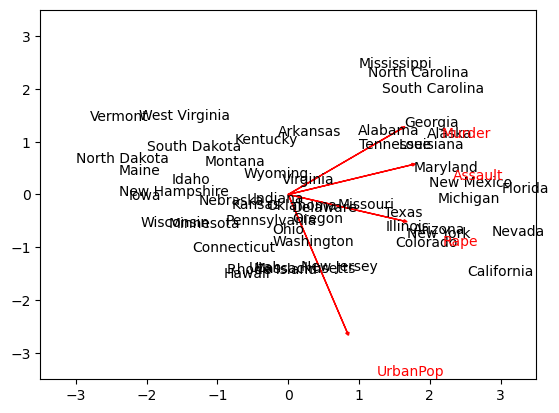

In [51]:
import matplotlib.pyplot as plt
plt.xlim(-3.5,3.5)
plt.ylim(-3.5,3.5)

for s in range(50):
    plt.text(x_list[s],y_list[s], states[s])

for i in range(4):
# (starting_x, starting_y, dx, dy, ...)
    plt.arrow(0,0, PC1[i]*3,PC2[i]*3, head_width=0.05, head_length=0.05, color='red')
    plt.annotate(features[i],
             xy=(PC1[i]*3.5, PC2[i]*3.5),
             xytext=(20, -20),
             textcoords='offset pixels', color='red')


plt.show()